# Analyzing the embeddings

This notebook pretends to analyze the output of the get_embeddings script

In [1]:
# Library imports
import os

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
from sentence_transformers import util

In [2]:
# Global variables
MODEL = 'multi-qa-mpnet-base-dot-v1'
DATA_PATH = '../data'
DATA_EMBEDDINGS_PATH = f'../data_embeddings/{MODEL}'
DATASET_EMBEDDINGS_PATH = f'../dataset_embeddings/{MODEL}'
DATASET_NAME = 'Rivert97/ug-normativity'

# Other Variables
filename = 'ley-organica-de-la-universidad-de-guanajuato'
#filename = 'estatuto-organico-de-la-universidad-de-guanajuato'
#filename = 'reglamento-de-mecanismos-alternos-de-solucion-de-controversias-ug-ugto'

In [3]:
# Loading the data
data = pd.read_csv(os.path.join(DATA_PATH, f"{filename}.csv"), sep=',')
embeddings = pd.read_csv(os.path.join(DATA_EMBEDDINGS_PATH, f"{filename}.csv"), sep=',', index_col=0)

In [4]:
data.head()

,document_name,title,path,parent,sentences
0,ley-organica-de-la-universidad-de-guanajuato,LEY ORGÁNICA DE LA UNIVERSIDAD DE GUANAJUATO,/root/LEY ORGÁNICA DE LA UNIVERSIDAD DE GUANAJ...,LEY ORGÁNICA DE LA UNIVERSIDAD DE GUANAJUATO,DICTAMEN DE LA COMISIÓN DE GOBERNACIÓN Y PUNTO...
1,ley-organica-de-la-universidad-de-guanajuato,I. Del proceso legislativo,/root/D I C T A M E N/I. Del proceso legislativo,I. Del proceso legislativo,Antecedentes 1. En el ejercicio de la facultad...
2,ley-organica-de-la-universidad-de-guanajuato,II. Trabajo de la comisión,/root/D I C T A M E N/II. Trabajo de la comisión,II. Trabajo de la comisión,Quienes integramos esta Comisión de Gobernació...
3,ley-organica-de-la-universidad-de-guanajuato,III. Fundamento constitucional de la materia e...,/root/D I C T A M E N/III. Fundamento constitu...,III. Fundamento constitucional de la materia e...,La iniciativa en estudio tiene sustento en lo ...
4,ley-organica-de-la-universidad-de-guanajuato,IV. Valoración de la iniciativa,/root/D I C T A M E N/IV. Valoración de la ini...,IV. Valoración de la iniciativa,Para el desarrollo del presente análisis y dic...


In [5]:
embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.434363,0.424539,-0.171204,0.280679,0.084210,-0.364482,-0.139645,0.393045,0.249619,0.353894,...,-0.350286,0.250727,-0.060458,0.294011,0.065321,0.212353,-0.084945,-0.317657,-0.390467,-0.107246
1,-0.340021,0.466494,-0.146184,0.222079,-0.018522,-0.529120,0.176575,0.349465,-0.047715,0.200768,...,-0.593357,0.082471,0.325703,0.087460,-0.002500,0.071658,-0.157353,-0.205331,-0.383321,0.034862
2,-0.341579,0.590322,-0.110237,0.059490,0.066331,-0.326537,0.184488,0.152167,-0.133803,0.068266,...,-0.616501,0.070029,-0.014567,0.035515,0.095475,0.049782,-0.175534,-0.630877,-0.394585,0.038051
3,-0.381004,0.225741,-0.225909,0.325977,-0.021064,-0.441375,0.112813,0.072671,-0.171903,0.222488,...,-0.530421,0.255400,-0.052161,0.187710,0.071661,0.082669,-0.157674,-0.295486,-0.364604,0.042931
4,-0.262034,0.157724,-0.129995,0.084295,0.154342,-0.366713,-0.087052,0.254177,-0.211838,0.157856,...,-0.648166,0.219369,0.036493,-0.038319,0.029621,-0.081126,-0.087598,-0.472696,-0.229321,-0.158967


In [6]:
# Loading questions dataset
dataset = load_dataset(DATASET_NAME)
dataset = dataset['train']
dataset = dataset.filter(lambda row: row['title'] == filename)

questions_embeddings = pd.read_csv(os.path.join(DATASET_EMBEDDINGS_PATH, f"{filename}.csv"), sep=',', index_col=0)

In [7]:
dataset

Dataset({
    features: ['id', 'title', 'context', 'additional_context', 'question', 'answers'],
    num_rows: 114
})

In [8]:
questions_embeddings

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
81e729afa369916be4d4db99f9c1817c,-0.241163,0.134452,-0.406884,0.027158,0.085603,-0.483060,0.077630,0.043037,0.057652,0.298042,...,-0.318571,0.118906,-0.137084,0.130610,-0.132854,0.029333,0.050718,-0.435967,-0.358353,-0.016664
28738544e42b076370fc813c5711852a,-0.353499,0.290611,-0.296301,0.106464,0.137439,-0.704990,0.105013,0.176509,0.034872,0.163687,...,-0.253740,0.151369,-0.292024,-0.047842,-0.051231,0.156694,-0.138280,-0.353606,-0.132102,0.200108
948cb616a68fe33024da19654b56a0b1,-0.077598,0.016400,-0.392371,0.015349,0.138048,-0.206328,0.224212,-0.187583,-0.016832,0.182006,...,-0.348328,0.145583,0.086896,0.089776,-0.162569,-0.153423,-0.010196,-0.298616,-0.358296,-0.083999
e80f3ca8fb8791ca480ee02bf9250484,-0.054256,0.148170,-0.450834,0.325257,0.108277,-0.137115,0.209664,-0.146938,-0.101442,0.378938,...,-0.360253,0.062257,-0.092317,0.148797,-0.188262,0.002434,-0.011241,-0.261277,-0.322584,0.012147
c1ca177b00aeae41aa361c243e612a9d,-0.252703,-0.193184,-0.384962,0.309104,0.024936,-0.346492,-0.082598,-0.207490,-0.029472,0.312388,...,-0.331739,0.161823,0.014994,-0.035412,-0.109686,0.234498,-0.079338,-0.343093,-0.132185,-0.082143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6c0faf36d205191964ae5a1582e1c804,-0.166262,0.144691,-0.380705,0.180002,0.164794,-0.332864,0.345870,-0.206776,0.111864,0.333909,...,-0.214767,0.225924,0.051001,0.200856,-0.182250,0.004929,-0.038517,-0.283061,-0.327981,-0.029745
d2679597685558ef9c1a0158452ef204,-0.457035,-0.044209,-0.320744,0.160276,0.004930,-0.215657,0.265613,-0.443395,0.002259,0.226742,...,-0.115665,0.197564,-0.026286,0.064389,-0.220610,-0.173592,-0.028820,-0.356315,-0.044712,-0.052822
d40c2da6c4422f4732ebba0abcf8b3b7,-0.340062,0.061185,-0.334158,0.093446,0.048074,-0.152664,0.139678,-0.318238,-0.062801,0.294663,...,-0.164870,0.295401,0.146719,-0.130964,-0.244516,-0.142379,0.053189,-0.369862,-0.130593,0.056805
0cb3797bf6238e3135b4afb1157fd65e,-0.149213,0.200428,-0.349729,0.252843,0.022970,-0.442764,0.493335,-0.197639,0.066866,0.335893,...,-0.029065,-0.026728,0.085031,0.014995,-0.264284,-0.064496,0.009520,-0.247516,-0.148597,0.080183


# Data Analysis

In [9]:
# For each question find its chunk
questions = []

for question in dataset:
    tmp_question = {
        'question': question,
        'question_embeddings': questions_embeddings.loc[question['id']].values,
        'chunk_idx': None,
        'chunk': None,
        'chunk_embeddings': None,
    }

    for chunk_idx, chunk in data.iterrows():
        if chunk['path'].lower().endswith(question['context'].lower().strip()):
            tmp_question['chunk_idx'] = chunk_idx
            tmp_question['chunk'] = chunk
            tmp_question['chunk_embeddings'] = embeddings.loc[chunk_idx].values
            break

    if tmp_question['chunk_idx'] is not None:
        questions.append(tmp_question)

Min:  tensor(16.8300, dtype=torch.float64)
Max:  tensor(32.4599, dtype=torch.float64)
Mean:  27.199482506113053


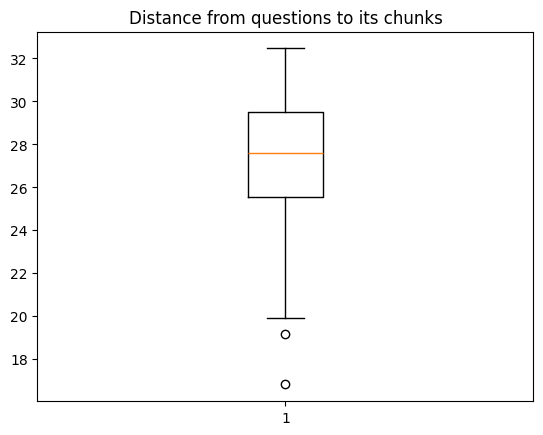

In [10]:
# Analyzing distances between questions and its chunks
distances = []
for question in questions:
    score = util.dot_score(question['question_embeddings'], question['chunk_embeddings'])
    distances.append(score[0][0])

plt.figure()
plt.title("Distance from questions to its chunks")
plt.boxplot(distances)
print("Min: ", min(distances))
print("Max: ", max(distances))
print("Mean: ", np.mean(distances))

Distance from question to chunk
Min:  tensor(16.8300, dtype=torch.float64)
Max:  tensor(32.4599, dtype=torch.float64)
Mean:  27.199482506113053
Top 5
Min:  19.92078241364458
Max:  33.59888788621709
Mean:  26.599456791037166
Top 5 mean
Min:  20.764047416668802
Max:  30.831347754182367
Mean:  26.59945679103717


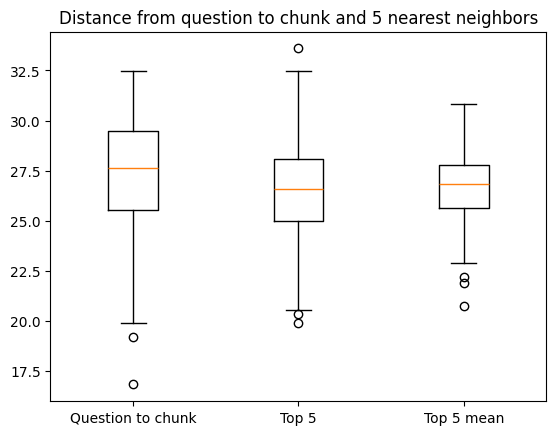

In [11]:
# Analyzing distance from each question to its K neighbors
k = 5
top_k_distances = []
top_k_distances_mean = []
top_k_embeddings_idx = {}
for question in questions:
    scores = util.dot_score(question['question_embeddings'], embeddings.values)[0].tolist()
    doc_score_pairs = list(zip(data.index.tolist(), scores))

    doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)

    dist = [d[1] for d in doc_score_pairs[:k]]
    idx = [d[0] for d in doc_score_pairs[:k]]

    top_k_distances.extend(dist)
    top_k_distances_mean.append(np.mean(dist))
    top_k_embeddings_idx[question['question']['id']] = idx

plt.figure()
plt.title(f"Distance from question to chunk and {k} nearest neighbors")
plt.boxplot((distances, top_k_distances, top_k_distances_mean), tick_labels=['Question to chunk', f'Top {k}', f'Top {k} mean'])
print("Distance from question to chunk")
print("Min: ", min(distances))
print("Max: ", max(distances))
print("Mean: ", np.mean(distances))
print(f"Top {k}")
print("Min: ", min(top_k_distances))
print("Max: ", max(top_k_distances))
print("Mean: ", np.mean(top_k_distances))
print(f"Top {k} mean")
print("Min: ", min(top_k_distances_mean))
print("Max: ", max(top_k_distances_mean))
print("Mean: ", np.mean(top_k_distances_mean))

In [12]:
# Analyzing percentaje of answers present in K nearest neighbors
count_in_top_k = 0
for question in questions:
    top_k_idx = top_k_embeddings_idx[question['question']['id']]
    if question['chunk_idx'] in top_k_idx:
        count_in_top_k += 1

print(f"% of presence in top {k}: {count_in_top_k/len(questions)}")

% of presence in top 5: 0.7368421052631579
